# Assignment 1

**Due to**: 11/01/2022 (dd/mm/yyyy)

If you deliver it by 11/12/2021 your assignment will be graded by 11/01/2022.


**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

Please, read ALL the following instructions :)

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. 

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

# STEP 1

In [93]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip dependency_treebank.zip
!rm dependency_treebank.zip

--2022-12-06 15:49:08--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.004s  

2022-12-06 15:49:08 (109 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]

Archive:  dependency_treebank.zip
   creating: dependency_treebank/
  inflating: dependency_treebank/wsj_0093.dp  
  inflating: dependency_treebank/wsj_0065.dp  
  inflating: dependency_treebank/wsj_0039.dp  
  inflating: dependency_treebank/wsj_0182.dp  
  inflating: dependency_treebank/wsj_0186.dp  
  inflating: dependency_treebank/wsj_0041.dp  
  inflating: 

In [94]:
# Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import pandas as pd
import os
import string
import numpy as np
import gensim
import gensim.downloader as gloader
import os
import shutil
import random
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay

from keras_preprocessing.sequence import pad_sequences

In [96]:
!mkdir train_set
!mkdir val_set
!mkdir test_set

mkdir: cannot create directory ‘train_set’: File exists
mkdir: cannot create directory ‘val_set’: File exists
mkdir: cannot create directory ‘test_set’: File exists


In [97]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [98]:
# Move first 100 text file to train
for i in range(1, 101):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/train_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 101-150 text file to val
for i in range(101, 151):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/val_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 151-199 text file to test
for i in range(151, 200):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/test_set/' + file_name)
  shutil.move(src_name, trg_name)

!rm -rf "/content/dependency_treebank"

In [99]:
def create_dataframe(dataset_path):
  dataframe_x_rows =  []
  dataframe_y_rows = []

  sentence_x_row = []
  sentence_y_row = []

  words = set([])
  tags = set([])

  for file_name in os.listdir(dataset_path):
    file_path = dataset_path + "/" + file_name
    file_number = file_name.split(".")[0].split("_")[1]

    with open(file_path, mode='r', encoding='utf-8') as file_text:
      lines = file_text.readlines()

      for line in lines:
        split_line = line.split("\t")
        if len(split_line) > 1:
          word = split_line[0].lower()
          pos_tag = split_line[1]

          words.add(word)
          tags.add(pos_tag)

          sentence_x_row.append(word)
          sentence_y_row.append(pos_tag)

          if word == '.' or word == ';':
            dataframe_x_rows.append(sentence_x_row)
            dataframe_y_rows.append(sentence_y_row)
            sentence_x_row = []
            sentence_y_row = []

  return dataframe_x_rows, dataframe_y_rows, words, tags

In [100]:
df_train_x, df_train_y, train_words, train_tags = create_dataframe("/content/train_set")

In [101]:
df_val_x, df_val_y, val_words, _ = create_dataframe("/content/val_set")

In [102]:
df_test_x, df_test_y, test_words, _ = create_dataframe("/content/test_set")

In [103]:
# the current choice is to give an id to each word
word2index =  {w: i + 2 for i, w in enumerate(set(list(train_words) + list(val_words) + list(test_words)))}
word2index['<PAD>'] = 0
word2index['<OOV>'] = 1

# same things applies here it is exploited the possibility to assign an id to
# tags, but one hot encoding could be performed instead
tag2index = {t: i for i, t in enumerate(list(train_tags))}

# duplicate words must be removed
print("Lenght of the complete word dictionary: " + str(len(word2index.keys()))) 
print("Length of the dictionary of the training set: " + str(len(train_words)))
print("Length of the dictionary of the validation set: " + str(len(val_words)))
print("Length of the dictionary of the test set: " + str(len(test_words)))
print("Total length: " + str(len(train_words) + len(val_words) + len(test_words)))

Lenght of the complete word dictionary: 10949
Length of the dictionary of the training set: 7404
Length of the dictionary of the validation set: 5420
Length of the dictionary of the test set: 3407
Total length: 16231


In [104]:
train_sentences_X, val_sentences_X, train_tags_y, val_tags_y = [], [], [], []

# function needed in order to convert each word of each sentence to an index 
def convert_all_sentences_to_indexes(df_x):
  sentences_X = []
  for sentence in df_x:
    converted_sentence = []
    for word in sentence:
      try:
        converted_sentence.append(word2index[word])
      except KeyError:
        converted_sentence.append(word2index["<OOV>"])
    sentences_X.append(converted_sentence)
  return sentences_X

train_sentences_X = convert_all_sentences_to_indexes(df_train_x)
val_sentences_X = convert_all_sentences_to_indexes(df_val_x)

print(f"shape of train_sentences_X: {(len(train_sentences_X), len(train_sentences_X[0]))}")
print(f"shape of val_sentences_X: {(len(val_sentences_X), len(val_sentences_X[0]))}")

shape of train_sentences_X: (2023, 30)
shape of val_sentences_X: (1323, 24)


In [105]:
# fitting a OneHotEncoder over tags
encoder = OneHotEncoder(sparse = False)
encoder.fit(np.array(list(train_tags)).reshape(-1, 1))
n_classes = len(train_tags)

In [106]:
MAX_LENGTH = len(max(train_sentences_X, key=len))

print("The maximum length of a sentence in the training set is: " + str(MAX_LENGTH))

The maximum length of a sentence in the training set is: 67


In [107]:
# converting tags to the associated indexes (we must OneHotEncode even these 
# tags, if we chose to change method)

"""
train_tags_y = [np.array([tag2index[t] for t in s] + [tag2index[s[-1]] for i in range(0,MAX_LENGTH-len(s))]) for s in df_train_y]
val_tags_y =[np.array([tag2index[t] for t in s[:MAX_LENGTH]] + [tag2index[s[-1]] for i in range(0,MAX_LENGTH-len(s))]) for s in df_val_y]
test_tags_y =[np.array([tag2index[t] for t in s[:MAX_LENGTH]] + [tag2index[s[-1]] for i in range(0,MAX_LENGTH-len(s))]) for s in df_test_y]
"""

def convert_to_one_hot(df_y):
  converted_one_hot_y = []
  for sentence in df_y:
    container = np.zeros((MAX_LENGTH, 45))
    single_encoded_sentence = encoder.transform(np.array(sentence).reshape(-1, 1))
    len_sentence = single_encoded_sentence.shape[0]
    if len_sentence >= MAX_LENGTH:
      container[:, :] = single_encoded_sentence[:MAX_LENGTH, :]
    else:
      container[:len_sentence, :] = single_encoded_sentence
      container[len_sentence:, :] = single_encoded_sentence[-1, :]
    converted_one_hot_y.append(container)
  return converted_one_hot_y

train_tags_y = convert_to_one_hot(df_train_y)
val_tags_y = convert_to_one_hot(df_val_y)
test_tags_y = convert_to_one_hot(df_test_y)

In [108]:
# adding a padding to each sentence, since they must have a fixed dimension 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
val_sentences_X = pad_sequences(val_sentences_X, maxlen=MAX_LENGTH, padding='post')

train_tags_y = np.asarray(train_tags_y)
val_tags_y = np.asarray(val_tags_y)
test_tags_y = np.asarray(test_tags_y)

print(f"shape of train_tags_y: {train_tags_y.shape}")
print(f"shape of val_tags_y: {val_tags_y.shape}")
print(f"shape of test_tags_y: {test_tags_y.shape}")

shape of train_tags_y: (2023, 67, 45)
shape of val_tags_y: (1323, 67, 45)
shape of test_tags_y: (653, 67, 45)


In [109]:
############### DO NOT DOWNLOAD TWICE ###############
#####################################################
#####################################################

# setting up the embedding model, in our case it is GloVe
embedding_dimension = 100
embedding_model = gloader.load("glove-wiki-gigaword-" + str(embedding_dimension))

In [110]:
# unclear why we have the number of tokens equal to train words + 2,
# one special character should be for the OOV terms, the other one could 
# be a refuse coming from the fact that we had a PAD term, whose function
# was to imitate the behaviour of the masks in the layers of the NN
num_tokens = len(word2index.keys()) + 2

# construction of the embedding matrix, it is a matrix N_token x E_dim
# whose entries are the vectors corresponding to each word in the 
# embedding space, identified by idx
embedding_matrix = np.zeros((num_tokens, embedding_dimension))
for word, idx in word2index.items():
  try:
    embedding_vector = embedding_model[word]
  except (KeyError, TypeError):
    embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension) # random placeholder
  embedding_matrix[idx] = embedding_vector

In [111]:
# printing all the tags in order to recognize which of these are punctuation
# marks
for tag, tag_value in tag2index.items():
  print(str(tag_value) + " " + tag)

0 NN
1 VB
2 CD
3 ''
4 RP
5 FW
6 RBR
7 PDT
8 $
9 VBG
10 LS
11 JJ
12 JJS
13 VBP
14 MD
15 :
16 UH
17 PRP
18 VBD
19 WP
20 POS
21 ``
22 VBN
23 CC
24 TO
25 #
26 RB
27 JJR
28 SYM
29 VBZ
30 ,
31 -LRB-
32 WP$
33 .
34 WDT
35 NNP
36 -RRB-
37 WRB
38 IN
39 EX
40 PRP$
41 DT
42 NNS
43 RBS
44 NNPS


# Baseline model

In [112]:
# function needed to extract the corresponding token from
# logits (scores for tokens are predicted as probabilities,
# we need to take the maximum and convert it to the corresponding
# token label)
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

# function needed to extract the categorical vector from a sequence
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

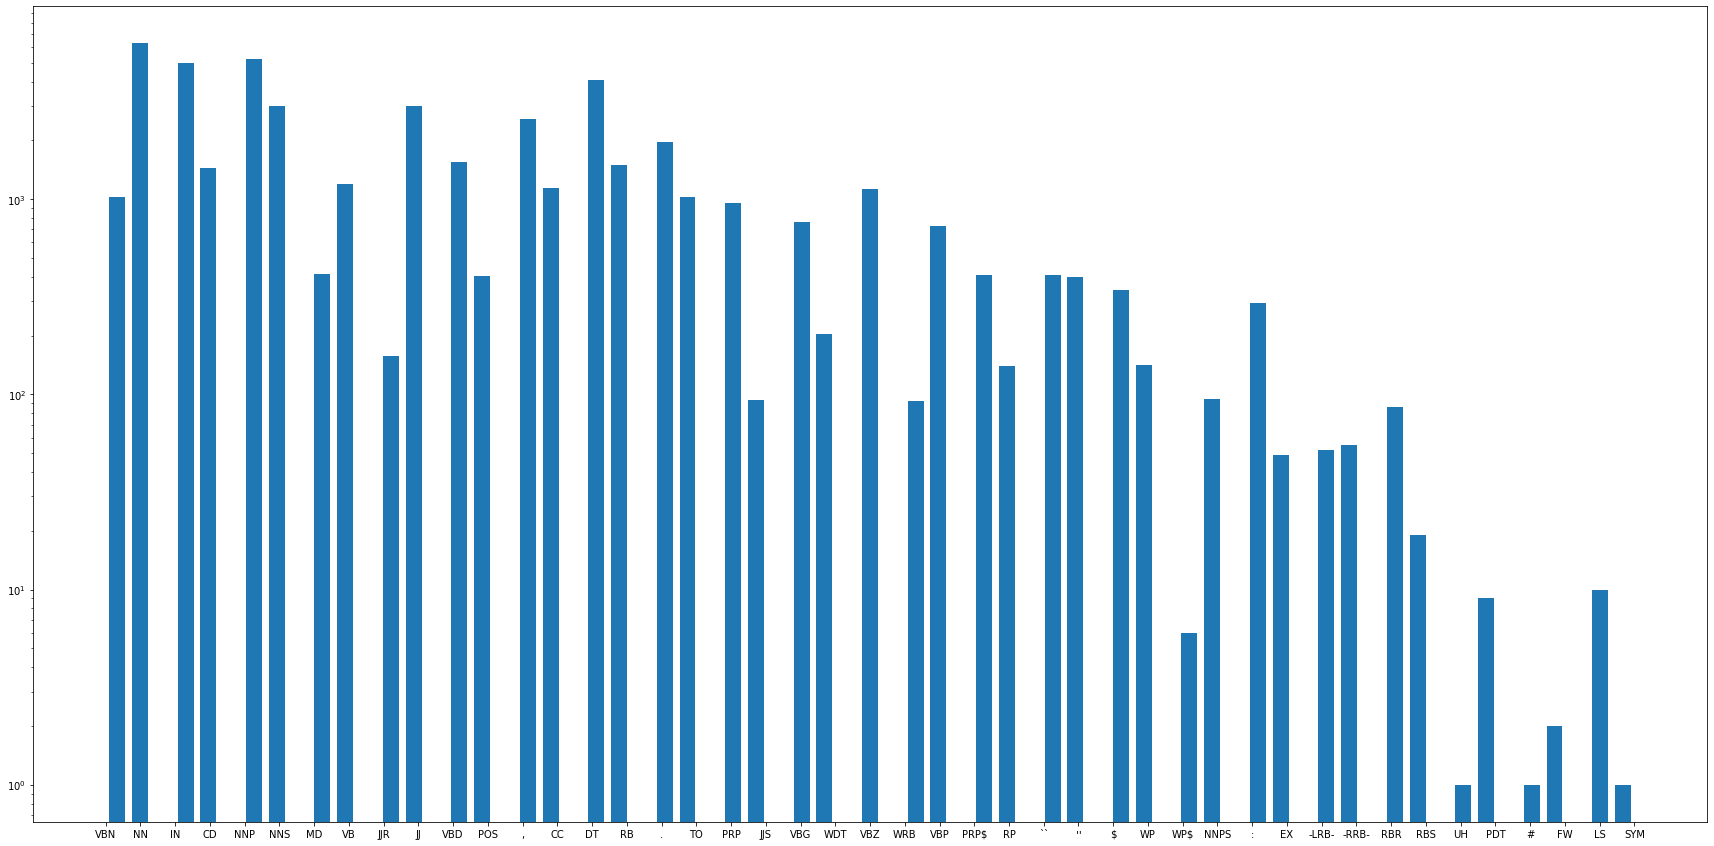

In [113]:
# simple block to plot the distribution of the tags in the training dataset
import matplotlib.pyplot as plt
%matplotlib inline

flatten_y = [word for sentence in df_train_y for word in sentence]

plt.figure(figsize=(30, 15))
plt.hist(flatten_y, bins="auto", log=True, rwidth=0.7);

In [114]:
# construction of a test sentence in the format accepted by the model
test_sentences_X = []
test_sentences_X = convert_all_sentences_to_indexes(df_test_x)
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')


In [115]:
# plotting function needed to show bias and variance of the fitted network
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from functools import partial
import random

def show_history(history: tf.keras.callbacks.History):
    """
    Shows training history data stored by the History Keras callback

    :param history: History Keras callback
    """
    history_data = history.history

    for key, value in history_data.items():
        if not key.startswith('val'):
            fig, ax = plt.subplots(1, 1)
            ax.set_title(key)
            ax.plot(value)
            if f'val_{key}' in history_data:
                ax.plot(history_data[f'val_{key}'])
            else:
                print(f"Couldn't find validation values for metric: {key}")

            ax.set_ylabel(key)
            ax.set_xlabel('epoch')
            ax.legend(['train', 'val'], loc='best')
    plt.show()

In [142]:
# Construction of the model, an attempt at modelling this as a class was
# performed, but it presented problems, so it was modeled as the output of
# a single function
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Activation, GRU
from keras.models import Model


# one lstm                                  -> (0.80 f1-macro lr: 1e-3) (Uppercase enabled)
# two lstm                                  -> (0.80 f1-macro lr: 1e-3) (Uppercase enabled)
# lstm + two dense (first td 200)           -> (0.14 f1-macro lr: 1e-3 200 epochs) (0.18 f1-macro lr: 1e-3 287 epochs both time distributed) (Uppercase enabled) not so good solution
# lstm + two dense two dense (first td 100) -> (0.40 f1-macro lr: 1e-2 100 epochs both time distributed) (Uppercase enabled)
# lstm + two dense (first td 100)           -> (0.45 f1-macro lr: 1e-2 100 epochs only the first one is time distributed) (Uppercase enabled)
# lstm + two dense (first td 100)           -> (0.43 f1-macro lr: 1e-2 100 epochs only the last one is time distributed) (Uppercase enabled)
# one gru                                   -> (0.83 f1-macro lr: 1e-3 100 epochs) (Uppercase enabled)

# one lstm                                  -> (0.83 f1-macro lr: 1e-3) (Lowercase enabled) 
# two lstm                                  -> (0.81 f1-macro lr: 1e-3) (Lowercase enabled)
# two dense (first td 100)                  -> (0.41 f1-macro lr: 1e-2 100 epochs only the first one is time distributed) (Lowercase enabled)
# two dense (first td 100)                  -> (0.62 f1-macro lr: 1e-2 100 epochs both time distributed) (Lowercase enabled)
# one gru                                   -> (0.87  f1-macro lr: 1e-3 100 epochs) (Lowercase enabled)

# one lstm  200d                            -> (0.83 f1-macro lr: 1e-3) (Lowercase enabled) 
#                                           -> (0.83 f1-macro lr: 1e-2) 
# two lstm 200d                             -> (0.81 f1-macro lr: 1e-3) (Lowercase enabled)
#                                           -> (0.81 f1-macro lr: 1e-2) 
# two dense (first td 200)  200d            -> (0.61 f1-macro lr: 1e-2 100 epochs both time distributed, the first is 200) (Lowercase enabled)
# two dense (first td 200)  100d            -> (0.81 f1-macro lr: 1e-2 100 epochs both time distributed, the first is 200 and activation relu) (Lowercase enabled)
# two dense (first td 200)  100d            -> (0.84 f1-macro lr: 5e-3 100 epochs both time distributed, activation relu) (Lowercase enabled)
# two dense (first td 200)  100d            -> (0.80 f1-macro lr: 5e-3 100 epochs both time distributed, activation relu) (Uppercase enabled)
# one gru 200d                              -> (0.85 f1-macro lr: 1e-3 100 epochs) (Lowercase enabled)
#                                           -> (0.83 f1-macro lr: 1e-2) //

# one lstm  300d                            -> (0.82 f1-macro lr: 1e-3) (Lowercase enabled) 
#                                           -> (0.85 f1-macro lr: 1e-2) // - NNPS better
# two lstm 300d                             -> (0.79 f1-macro lr: 1e-3) (Lowercase enabled)
#                                           -> (0.84 f1-macro lr: 1e-2) // 
#                                           -> (0.79 f1-macro lr: 1e-2) // 150->100
# two dense (first td 200)  300d            -> (0.49 f1-macro lr: 1e-2 100 epochs both time distributed, the first is 200) (Lowercase enabled)
# one gru 300d                              -> (0.83 f1-macro lr: 1e-3 100 epochs) (Lowercase enabled)
#                                           -> (0.85 f1-macro lr: 1e-2) //
# two dense (first td 200)  100d            -> (0.82 f1-macro lr: 1e-2 100 epochs both time distributed, the first is 100 with activation relu) (Lowercase enabled) 
#                                                                               (step scheduler halving the lr every 5 epochs)
# two dense (first td 200)  100d            -> (0.81 f1-macro lr: 1e-2 100 epochs both time distributed, the first is 100 with activation relu) (Lowercase enabled) 
#                                                                               (step scheduler halving the lr every 3 epochs)
# two dense (first td 200)  100d            -> (0.82 f1-macro lr: 5e-3 100 epochs both time distributed, the first is 100 with activation relu) (Lowercase enabled) 
#                                                                               (step scheduler halving the lr every 3 epochs)
# one lstm  300d                            -> (0.85 f1-macro lr: 1e-2)         (step scheduler halving the lr every 3 epochs)                                  
def build_model(num_tokens, embedding_dimension, embedding_matrix):
  # Improvement from 100 to 200 in the Time distributed dense layer because 
  # the fisrt Dense layer created a bottleneck (or squashing, since we used softmax for this layer too)
  # in the structure of the network, which should resable an inverted hourglass ( <|_connections_|> )
  # and not a funnel ( \|_connections_|/ )
    input = Input(shape=(None,), dtype="int32")
    x = Embedding(num_tokens,
                  embedding_dimension,
                  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                  trainable=False,
                  mask_zero=True)(input)
    # x = Bidirectional(LSTM(100, return_sequences = True))(x)
    # x = Bidirectional(LSTM(100, return_sequences = True))(x)
    x = Bidirectional(GRU(100, return_sequences=True))(x)
    # x = Bidirectional(LSTM(100, return_sequences=True))(x)
    # x = TimeDistributed(Dense(100, activation="relu"))(x) # changed from softmax
    x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
    return Model(input, x)

 
print(num_tokens)
print(embedding_dimension)
model = build_model(num_tokens, embedding_dimension, embedding_matrix)
# learning rate scheduling could be a thing when we are satisfied with the
# model performances
learning_rate_val = 1e-2
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate_val),
              metrics=['accuracy'])

model.summary()

10951
100
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_9 (Embedding)     (None, None, 100)         1095100   
                                                                 
 bidirectional_9 (Bidirectio  (None, None, 200)        121200    
 nal)                                                            
                                                                 
 time_distributed_18 (TimeDi  (None, None, 45)         9045      
 stributed)                                                      
                                                                 
Total params: 1,225,345
Trainable params: 130,245
Non-trainable params: 1,095,100
_________________________________________________________________


In [143]:
# training block, here we gotta tweak the parameters
training_info = {
    'verbose': 1,
    'epochs': 100,
    'batch_size': 64,
}


def step_scheduler(epoch, lr): # insight: bad results for this task
  if epoch>1 and epoch % 3 == 0:
    return lr/2
  else: 
    return lr

def linear_scheduler(epoch, lr): # insight: bad results for this task
  final_learning_rate = 0 
  lr_to_return = final_learning_rate + (learning_rate_val - final_learning_rate) * (1 - epoch/training_info["epochs"])
  return lr_to_return


def warmup_scheduler(epoch, lr):
  starting_ones = 5
  if epoch < starting_ones:
    return 1e-3
  elif epoch == starting_ones:  
    return step_scheduler(epoch, learning_rate_val)
  else:
    return step_scheduler(epoch, lr)


pat = 10 #setting the patience value
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, min_delta=1e-4, restore_best_weights=True)
scheduler_verbose_par = 1
scheduler = tf.keras.callbacks.LearningRateScheduler(step_scheduler, scheduler_verbose_par)

print(f"Start training! \nParameters: {training_info}")
history = model.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks = [scheduler, es],
                    **training_info)

Start training! 
Parameters: {'verbose': 1, 'epochs': 100, 'batch_size': 64}

Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
32/32 [==============================] - 10s 97ms/step - loss: 0.4171 - accuracy: 0.6893 - val_loss: 0.2050 - val_accuracy: 0.8485 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1308 - accuracy: 0.8913 - val_loss: 0.1569 - val_accuracy: 0.8878 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0898 - accuracy: 0.9266 - val_loss: 0.1410 - val_accuracy: 0.9007 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.004999999888241291.
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0659 - accuracy: 0.9475 - val_loss: 0.1327 - val_accuracy: 0.9072

Couldn't find validation values for metric: lr


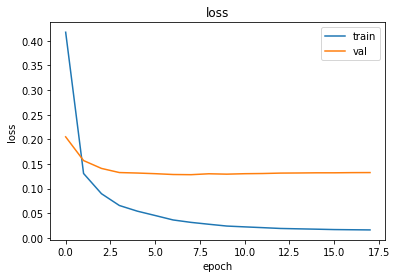

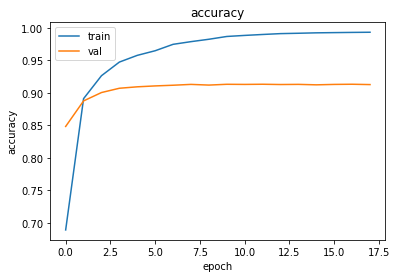

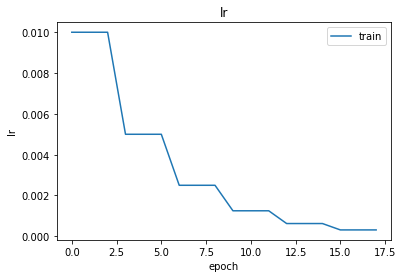

In [144]:
show_history(history)

In [145]:
# the following blocks are all needed in order to compute the classification
# report and thus the F1-macro score, the punctuation classes must
# be excluded in the computation of the scores
from sklearn.metrics import f1_score, classification_report, confusion_matrix

pred = model.predict(test_sentences_X)

print(pred.shape)

21/21 [==============================] - 2s 5ms/step
(653, 67, 45)


In [147]:
def convert_labels(e):
  # set the highest value to 1
  e[np.argmax(e)]=1
  # set the rest to 0
  e[e!=1]=0
  return e

def reduce_results(test, y_true, y_pred):
  to_suppress = np.array(["\'\'", "-RRB-", ".", 
                          ":", ",", "-LRB-", "``", 
                          "#", "$"]).reshape(-1, 1)
  #print(to_suppress)
  encoded_punct = encoder.transform(to_suppress)
  #print(encoded_punct)
  verylonglist_pred = []
  verylonglist_true = []
  j = 0
  for e in test:
    maxlen = min(len(e), MAX_LENGTH)
    for i in range(0,maxlen):
      #print(y_true[j][i])
      dec_y_true = encoder.inverse_transform(np.array(y_true[j][i]).reshape(1, -1))
      #if dec_y_true not in to_suppress:
      verylonglist_pred.append(convert_labels(y_pred[j][i]))
      verylonglist_true.append(y_true[j][i])
    j = j + 1 
  #verylonglist_true = encoder.transform(verylonglist_true)
  #verylonglist_pred = encoder.transform(verylonglist_pred)  
  return verylonglist_true, verylonglist_pred


def custom_f1(true_y, pred_y, excluded_true_labels):
  labels = list(encoder.categories_[0])
  cm = confusion_matrix(true_y, pred_y, labels=labels)
  f1 = 0
  label_counter = 0
  for i in range(len(labels)):
    if not labels[i] in excluded_true_labels:
      tp = cm[i,i] 
      fp = sum(cm[:,i]) - tp
      fn = sum(cm[i,:]) - tp
      if tp!= 0:
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        f1 += 2*(recall*precision)/(recall+precision)
      elif fp==0 and fn == 0:
        continue
      label_counter += 1
  return f1/label_counter ##


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          CC       0.99      0.99      0.99       366
          CD       0.97      0.97      0.97       858
          DT       0.98      0.99      0.99      1334
          EX       0.83      1.00      0.91         5
          IN       0.97      0.95      0.96      1630
          JJ       0.79      0.85      0.82       918
         JJR       0.91      0.85      0.88        59
         JJS       0.97      0.94      0.95        31
          MD       0.95      0.99      0.97       167
          NN       0.90      0.88      0.89      2381
         NNP       0.88      0.88      0.88      1504
        NNPS       0.22      0.05      0.08        44
         NNS       0.87      0.92      0.90       941
         PDT       0.00      0.00      0.00         4
         POS       0.99      1.00      1.00       152
         PRP       0.98      0.98      0.98       192
        PRP$       0.99      0.99      0.99        99
          RB       0.80    

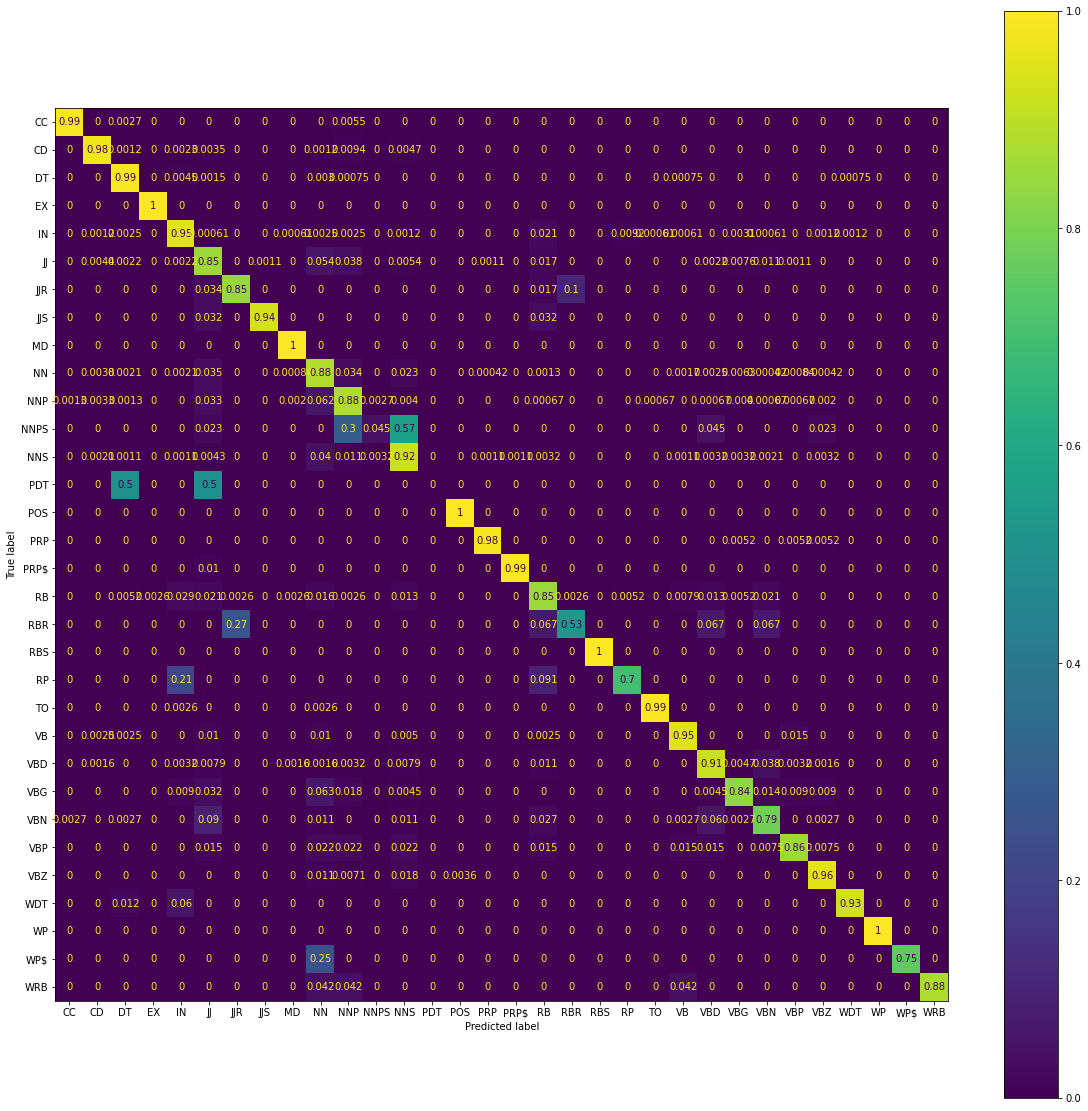

In [148]:
true_y, pred_y = reduce_results(df_test_x, test_tags_y, pred)
true_y = encoder.inverse_transform(true_y)
pred_y = encoder.inverse_transform(pred_y)

to_suppress = np.array(["\'\'", "-RRB-", ".", 
                          ":", ",", "-LRB-", "``", 
                          "#", "$"])
not_missing = np.unique(np.array(list(np.concatenate(df_test_y).flat)))
# exclude tokens which labels are punctuation classes
new_cat = [encoder.categories_[0][i] for i in range(0, len(encoder.categories_[0])) if encoder.categories_[0][i] not in to_suppress and encoder.categories_[0][i] in not_missing ]

fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(new_cat), normalize = "true")#encoder.categories_[0]))
print(classification_report(true_y,pred_y, labels = new_cat))
print(custom_f1(true_y, pred_y, list(to_suppress)))